In [230]:
%matplotlib notebook

In [131]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import scipy.stats as stats

import os
from census import Census
from pprint import pprint
# Census API Key
from config import api_key

buz_info  = 44021
zipcode = pd.read_csv("Resources/Public_ZipCode.csv")
zipcode2 = pd.read_csv("Resources/charter_df.csv")
zipcode.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013.0
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013.0
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616.0
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717.0
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717.0


In [132]:
#API CALL
#zipcode[["zipcode","extra"]] = zipcode["Zip Code"].str.split("-",expand=True)
zcode = zipcode['Zip Code']
zip_pd = pd.DataFrame(zcode)

zcode2 = zipcode2['Zip Code']
zip_pd2 = pd.DataFrame(zcode2)

zip_pd2.head()

,Zip Code
0,45404
1,45207
2,43537
3,44115
4,44663


In [133]:
zip_pd.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [134]:
zcode.head()

0    45810
1    45810
2    44870
3    45760
4    45760
Name: Zip Code, dtype: int64

In [135]:
list(zcode)

[45810,
 45810,
 44870,
 45760,
 45760,
 45013,
 43802,
 43207,
 45656,
 45656,
 45369,
 45503,
 45404,
 45207,
 45631,
 45669,
 43011,
 43901,
 45628,
 43537,
 44122,
 45601,
 44121,
 43604,
 44115,
 44663,
 43344,
 45710,
 44133,
 44857,
 44644,
 43207,
 45414,
 44320,
 44709,
 43604,
 44130,
 44502,
 43609,
 44484,
 45237,
 44883,
 45710,
 44134,
 44111,
 44102,
 44134,
 44134,
 43613,
 44503,
 44817,
 44055,
 45859,
 44256,
 43302,
 43302,
 43430,
 44306,
 44311,
 45850,
 44255,
 44255,
 43138,
 43138,
 43138,
 44030,
 44030,
 44906,
 45601,
 44805,
 44707,
 43920,
 45640,
 43219,
 45850,
 45144,
 45144,
 45651,
 44601,
 45801,
 45212,
 45804,
 44132,
 44102,
 45036,
 45036,
 43229,
 45101,
 43119,
 43227,
 45505,
 43229,
 43207,
 45155,
 44555,
 44134,
 43102,
 44111,
 44123,
 43615,
 45044,
 43229,
 43205,
 43232,
 43204,
 45214,
 44112,
 43102,
 44102,
 45202,
 45410,
 45102,
 45103,
 45224,
 44052,
 43207,
 45103,
 45801,
 43207,
 44485,
 45711,
 45415,
 44509,
 44077,
 43614,


In [136]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels

# set up a parameters dictionary
ZIPCODE = []
PAYANN = []



for code in zcode:  
  
    # base url
    query_url = f"https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:{code}&key={api_key}"
    
    print(query_url) 
    
    #response = requests.get(base_url).json()
  
    
    #Run requests to grab the JSON at the requested URL
    
    response = requests.get(query_url)
    print(response.status_code)
    
    if response.status_code == 200:
        jsonResponse = response.json()
        ZIPCODE.append(jsonResponse[1][0])       
        PAYANN.append(jsonResponse[1][2]) 
        
        
#pprint(response)

#ZIPCODE
#print(EMPSZES)       
#PAYANN


https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45810&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45810&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45760&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45760&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43802&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44030&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44030&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44906&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44707&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:439

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44646&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45255&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44321&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43003&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44004&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:431

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45434&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45419&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44146&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45218&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44704&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43906&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45305&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45237&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44264&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44120&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44118&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44695&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43402&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43402&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:436

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45680&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43567&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43609&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44021&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44822&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45304&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45377&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43723&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43140&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45040&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43545&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44890&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45692&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45014&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44904&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44240&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44720&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200


https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45420&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43202&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44614&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45113&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45245&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44254&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44408&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45832&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44255&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45806&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43402&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43528&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43420&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:437

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45238&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44620&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45377&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44109&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44134&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45177&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:435

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43065&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43920&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43016&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44307&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44483&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44484&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44485&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44485&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44107&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44107&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44137&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44104&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45772&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45613&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44095&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45432&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44683&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44905&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44012&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44221&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44707&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45215&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43440&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45365&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44077&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45220&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45406&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43556&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44126&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43205&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44820&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44270&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45895&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45895&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44224&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44854&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44138&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44515&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45324&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45239&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44109&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45358&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43210&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44122&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44709&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43822&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44627&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43019&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45405&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43223&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43968&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43214&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43056&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:446

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43610&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45732&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44306&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44116&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44221&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44102&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43521&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45205&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43521&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45629&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45629&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44836&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44134&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44677&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43215&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45335&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45335&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:444

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44708&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43326&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44094&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43054&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43326&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43469&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43054&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44118&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44333&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45246&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44146&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45373&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43613&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43526&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43526&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45356&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44236&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45005&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44077&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44062&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44839&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43004&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43004&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43412&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43988&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43908&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45248&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44106&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45503&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44050&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44718&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43447&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43447&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43447&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43333&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44410&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:446

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44281&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45505&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44107&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43230&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43230&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45215&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43230&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45891&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43223&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43755&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44905&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44057&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44907&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43140&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44905&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45426&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44090&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:454

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44102&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43606&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44143&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44143&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45651&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44301&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45885&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45858&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45858&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44721&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44062&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44017&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44653&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45211&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44903&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43219&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43219&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43543&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43209&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43756&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45414&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200


https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45377&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45342&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45239&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45867&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44659&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43338&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43764&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43764&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44851&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44851&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45346&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44442&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45157&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45157&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45157&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44853&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:448

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45840&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45652&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44614&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45502&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44287&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45502&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43612&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43619&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43619&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44203&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44203&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44203&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43061&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43420&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43402&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45875&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43606&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43606&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43611&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45875&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45876&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45876&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44281&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43553&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44314&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45750&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43734&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43113&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43147&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43147&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43607&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43725&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45661&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45661&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44070&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43551&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43554&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45881&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44505&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43067&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45215&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200


https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44057&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44012&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44425&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45121&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45505&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44460&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44833&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43607&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44437&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44240&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45503&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44272&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44272&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44272&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43068&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45042&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45237&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45233&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45505&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44320&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43116&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43227&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44113&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44440&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45679&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45679&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44305&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45243&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44273&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:454

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44307&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43206&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44094&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45804&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44089&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45409&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44827&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44266&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43311&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45368&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45771&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:444

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43230&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44260&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45807&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45305&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44880&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43223&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44827&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45217&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45459&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44826&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44824&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44113&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43221&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44683&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45067&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43203&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43821&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45732&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44691&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:453

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45830&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44089&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44089&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45215&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45380&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45380&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44406&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:440

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45784&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43844&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44446&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44052&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43442&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:431

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45385&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45805&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44883&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45309&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43912&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44140&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43311&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:449

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45177&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45244&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43085&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45013&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44312&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43220&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44288&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43211&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44690&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43220&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43953&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:439

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44221&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45324&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45840&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45840&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45005&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43302&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44460&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45365&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44224&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45243&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43950&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:451

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44601&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44706&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44807&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44077&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44012&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44047&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45230&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43311&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45887&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44484&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44484&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44870&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44266&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:442

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44444&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44136&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43017&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43054&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44654&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45014&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44060&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43764&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45005&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45373&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45732&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44256&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45371&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44112&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43215&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45458&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44654&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43610&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45244&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44039&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43229&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43220&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43235&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:435

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43017&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43235&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43081&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43230&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44224&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45069&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43016&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43017&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43017&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44470&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45208&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:450

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43026&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43528&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43017&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45652&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45652&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45154&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43004&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43016&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45167&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43119&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:450

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45385&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44320&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45449&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44129&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44035&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44111&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44104&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44129&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44105&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44707&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45213&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45406&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:432

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43119&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43123&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45429&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45039&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43147&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43147&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45368&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43512&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45142&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45142&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44281&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45050&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:450

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44102&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45415&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43068&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45406&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45011&key=2af5575ace0b8385c92d40ea1d52fe11407acc24


200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45231&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45662&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44241&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43147&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43147&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45106&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:451

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43302&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43302&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45225&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43725&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43725&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43725&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43302&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:430

In [138]:
ZIPCODE2 = []
PAYANN2 = []



for code in zcode2:  
  
    # base url
    query_url = f"https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:{code}&key={api_key}"
    
    print(query_url) 
    
    #response = requests.get(base_url).json()
  
    
    #Run requests to grab the JSON at the requested URL
    response2 = requests.get(query_url)
    print(response2.status_code)
    
    if response2.status_code == 200:
        jsonResponse2 = response2.json()
        ZIPCODE2.append(jsonResponse2[1][0])       
        PAYANN2.append(jsonResponse2[1][2]) 
        
   

https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45404&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43537&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44115&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44663&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43207&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45414&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44320&k

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43612&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44509&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44103&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43228&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44114&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43232&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43055&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:436

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43701&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43227&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44883&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44304&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44130&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44507&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44659&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:452

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43945&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43605&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43609&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44128&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45212&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44119&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44310&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:802

200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43204&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45426&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:45044&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43607&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:43624&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
204
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:44135&key=2af5575ace0b8385c92d40ea1d52fe11407acc24
200
https://api.census.gov/data/2016/zbp?get=ZIPCODE,EMPSZES,PAYANN&for=zipcode:441

In [139]:
# create dataframe
public_payfoll_by_ZIP_df = pd.DataFrame({"ZIPCODE": ZIPCODE,"Total Annual Payroll": PAYANN})
public_payfoll_by_ZIP_df.tail()

,ZIPCODE,Total Annual Payroll
3363,44287,26602
3364,43123,832214
3365,45813,6764
3366,43762,38920
3367,45640,165770


In [140]:
charter_payfoll_by_ZIP_df = pd.DataFrame({"ZIPCODE": ZIPCODE2,"Total Annual Payroll": PAYANN2})
charter_payfoll_by_ZIP_df.tail()

,ZIPCODE,Total Annual Payroll
270,43078,299452
271,43302,743805
272,44052,124384
273,43337,0
274,45801,685344


In [141]:
csvpath = "Resources/Public_School_Data.csv"
raw_data = pd.read_csv(csvpath)
charter_schools_data = pd.read_csv("Resources/1617_CS_ACHIEVEMENT.csv") 
charter_schools_data.columns

Index(['Building IRN', 'Building Name', 'District IRN', 'District Name',
       'County', 'Region', 'Address', 'City and Zip Code', 'Phone #',
       'Principal', 'Performance Index Score 2016-17',
       'Performance Index Percent 2016-17',
       'Letter Grade of Performance Index', 'Percent of Students Not Tested',
       'Percent of Students Below', 'Percent of Students Basic',
       'Percent of Students Proficient', 'Percent of Students Accelerated',
       'Percent of Students Advanced', 'Percent of Students Advanced Plus',
       'Gifted Performance Index Score 2016-17',
       'Gifted Performance Index 2016-17',
       'Percent of Gifted Students Not Tested',
       'Percent of Gifted Students Below', 'Percent of Gifted Students Basic',
       'Percent of Gifted Students Proficient',
       'Percent of Gifted Students Accelerated',
       'Percent of Gifted Students Advanced',
       'Percent of Gifted Students Advanced Plus',
       'Performance Index Score 2015-16', 'Perform

In [142]:
#Public and Charter School Datat
public_df = raw_data[["Building Name", "District Name", "County", "City, State, Zip Code", "Performance Index Score 2015-16"]]
charter_schools_df = charter_schools_data.loc[:, ['Building Name', 'District Name', 'County', 'City and Zip Code', 'Performance Index Score 2016-17']]                                


In [143]:
charter_schools_df[["City", "State", "Zip Code"]] = charter_schools_df["City and Zip Code"].str.split(",",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df.head()

,Building Name,District Name,County,City and Zip Code,Performance Index Score 2016-17,City,State,Zip Code
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404-2123
1,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207-1644
2,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",74.046,Maumee,OH,43537-1374
3,"Ohio Connections Academy, Inc","Ohio Connections Academy, Inc",Cuyahoga,"Cleveland, OH, 44115-2229",77.619,Cleveland,OH,44115-2229
4,Quaker Digital Academy,New Philadelphia City,Tuscarawas,"New Philadelphia, OH, 44663-2150",65.397,New Philadelphia,OH,44663-2150


In [144]:
charter_schools_df[["City", "State", "Zip Code"]] = charter_schools_df["City and Zip Code"].str.split(",",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df[["Zip Code", "Code+4"]] = charter_schools_df["Zip Code"].str.split("-",expand=True).rename(columns=lambda x: f"string_{x+1}")
charter_schools_df.head()


,Building Name,District Name,County,City and Zip Code,Performance Index Score 2016-17,City,State,Zip Code,Code+4
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123
1,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207,1644
2,Wildwood Environmental Academy,Wildwood Environmental Academy,Lucas,"Maumee, OH, 43537-1374",74.046,Maumee,OH,43537,1374
3,"Ohio Connections Academy, Inc","Ohio Connections Academy, Inc",Cuyahoga,"Cleveland, OH, 44115-2229",77.619,Cleveland,OH,44115,2229
4,Quaker Digital Academy,New Philadelphia City,Tuscarawas,"New Philadelphia, OH, 44663-2150",65.397,New Philadelphia,OH,44663,2150


In [145]:
public_df[["City","State", "Zip Code"]] = public_df["City, State, Zip Code"].str.split(",",expand=True)
public_df[["Zip Code", "Code+4"]] = public_df["Zip Code"].str.split("-",expand=True)
public_df.head()

C:\Users\jnovic\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717


In [146]:
public_df.to_csv("Resources/Public_ZipCode.csv", index=False, header=True)

In [147]:
public_payfoll= public_payfoll_by_ZIP_df.rename(columns={"ZIPCODE": "Zip Code"})
public_payfoll.head()

,Zip Code,Total Annual Payroll
0,45810,77875
1,45810,77875
2,44870,894118
3,45760,9171
4,45760,9171


In [148]:
public_df.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013
1,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013
2,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616
3,Meigs Primary School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",NC,Middleport,OH,45760,9717
4,Meigs Intermediate School,Meigs Local,Meigs,"Middleport, OH, 45760-9717",70.394,Middleport,OH,45760,9717


In [149]:
public_df["Zip Code"]= public_df["Zip Code"].astype(int)
public_payfoll["Zip Code"]=public_payfoll["Zip Code"].astype(int)
public_payfoll.dtypes

C:\Users\jnovic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Zip Code                 int32
Total Annual Payroll    object
dtype: object

In [150]:
#Problems Merging
public_pay_df= public_df.merge(public_payfoll, on="Zip Code")
public_pay_df.head()

,Building Name,District Name,County,"City, State, Zip Code",Performance Index Score 2015-16,City,State,Zip Code,Code+4,Total Annual Payroll
0,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013,77875
1,Ada Elementary School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",96.125,Ada,OH,45810,1013,77875
2,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013,77875
3,Ada High School,Ada Exempted Village,Hardin,"Ada, OH, 45810-1013",91.667,Ada,OH,45810,1013,77875
4,Sandusky Middle School,Sandusky City,Erie,"Sandusky, OH, 44870-2616",62.772,Sandusky,OH,44870,2616,894118


In [151]:
charter_payfoll= charter_payfoll_by_ZIP_df.rename(columns={"ZIPCODE": "Zip Code"})
charter_schools_df["Zip Code"]= charter_schools_df["Zip Code"].astype(int)
charter_payfoll["Zip Code"]=charter_payfoll["Zip Code"].astype(int)                                                                     
charter_pay_df = pd.merge(charter_schools_df, public_payfoll, on="Zip Code")
charter_pay_df.head()

,Building Name,District Name,County,City and Zip Code,Performance Index Score 2016-17,City,State,Zip Code,Code+4,Total Annual Payroll
0,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123,615078
1,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123,615078
2,Pathway School of Discovery,Pathway School of Discovery,Montgomery,"Dayton, OH, 45404-2123",79.49,Dayton,OH,45404,2123,615078
3,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207,1644,137872
4,Alliance Academy of Cincinnati,Alliance Academy of Cincinnati,Hamilton,"Cincinnati, OH, 45207-1644",64.585,Cincinnati,OH,45207,1644,137872


In [152]:
public_df = public_df.loc[public_df["Performance Index Score 2015-16"] != "NC"]
charter_schools_df = charter_schools_df.loc[charter_schools_df["Performance Index Score 2016-17"] != "NC"]
public_df["Performance Index Score 2015-16"]=public_df["Performance Index Score 2015-16"].astype(float)
charter_schools_df['Performance Index Score 2016-17']=charter_schools_df['Performance Index Score 2016-17'].astype(float)

In [153]:
#Ethnicity/Race Data
csvpath2 = "Resources/Ethnicity.csv"
raw_data_race = pd.read_csv(csvpath2)
ethnic_df = pd.read_csv(csvpath2)
    


C:\Users\jnovic\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
### Replace the >95
race_df = raw_data_race[["Building Name", "Student Group","% of Total Enrollment"]]
race_df = race_df.replace(to_replace = "NC", value = 0)
race_df["% of Total Enrollment"]= race_df["% of Total Enrollment"].astype(str)
race_df["% of Total Enrollment"] = race_df["% of Total Enrollment"].replace(to_replace = r'>95', value = 95.1, regex=True)
race_df["% of Total Enrollment"]=race_df["% of Total Enrollment"].astype(float)


In [155]:

df_white = race_df.loc[race_df["Student Group"] == "White", :]
df_latinx = race_df.loc[race_df["Student Group"] == "Hispanic", :]
df_black = race_df.loc[race_df["Student Group"] == "Black", :]

In [156]:
race_df.head(30)

,Building Name,Student Group,% of Total Enrollment
0,Ada Elementary School,American Indian or Alaskan Native,0.0
1,Ada Elementary School,Asian or Pacific Islander,0.0
2,Ada Elementary School,Black,3.4
3,Ada Elementary School,Hispanic,0.0
4,Ada Elementary School,Multiracial,0.0
5,Ada Elementary School,White,92.5
6,Ada High School,American Indian or Alaskan Native,0.0
7,Ada High School,Asian or Pacific Islander,0.0
8,Ada High School,Black,0.0
9,Ada High School,Hispanic,0.0


In [157]:
public_race_white = df_white.merge(public_df, on="Building Name")
public_race_latinx = df_latinx.merge(public_df, on="Building Name")
public_race_black = df_black.merge(public_df, on="Building Name")

charterwhite_df = pd.merge(charter_schools_df, df_white, on="Building Name") 
charterblack_df = pd.merge(charter_schools_df, df_black, on="Building Name") 
charterhispanic_df = pd.merge(charter_schools_df, df_latinx, on="Building Name") 

In [158]:
#Econ Data
csvpath3 = "Resources/Economic.csv"
raw_data_econ = pd.read_csv(csvpath3)
raw_data_econ.head()

,Building IRN,Building Name,District IRN,District Name,County,Region,Open/Closed Status as of 9/12/2017,School Type,Student Group,Read 3rd Grade 2016-2017 % Proficient or above,...,Geometry End of Course 2016-2017 % Proficient or Above,Integrated Math I End of Course 2016-2017 % Proficient or Above,Integrated Math II End of Course 2016-2017 % Proficient or Above,Biology End of Course 2016-2017 % Proficient or Above,Attendance rate 2016-2017,4-Year Longitudinal Graduation Rate - Class of 2016,5-Year Longitudinal Graduation Rate - Class of 2015,Enrollment,% of Total Enrollment,Watermark
0,59,Ada Elementary School,45187,Ada Exempted Village,Hardin,Region 6,Open,Elementary School,Disadvantaged,77.4,...,NC,NC,NC,NC,>95.0,NC,NC,201,43.2,NaN
1,59,Ada Elementary School,45187,Ada Exempted Village,Hardin,Region 6,Open,Elementary School,NonDisadvantaged,92.3,...,NC,NC,NC,NC,>95.0,NC,NC,264,56.8,NaN
2,67,Ada High School,45187,Ada Exempted Village,Hardin,Region 6,Open,High School,Disadvantaged,NC,...,56.0,NC,NC,75.0,92.6,78.9,92.3,155,39.7,NaN
3,67,Ada High School,45187,Ada Exempted Village,Hardin,Region 6,Open,High School,NonDisadvantaged,NC,...,62.9,NC,NC,89.6,94.7,>95.0,94.0,235,60.3,NaN
4,83,Sandusky Middle School,44743,Sandusky City,Erie,Region 2,Open,Middle School,Disadvantaged,NC,...,NC,NC,NC,NC,94.0,NC,NC,443,>95.0,NaN


In [159]:


econ_df = raw_data_econ[["Building Name", "Student Group","% of Total Enrollment"]]
econ_df = econ_df.replace(to_replace = "NC", value = 0)
econ_df["% of Total Enrollment"]= econ_df["% of Total Enrollment"].astype(str)
econ_df["% of Total Enrollment"] = econ_df["% of Total Enrollment"].replace(to_replace = r'>95', value = 95.1, regex=True)
econ_df["% of Total Enrollment"]=econ_df["% of Total Enrollment"].astype(float)

In [160]:
df_poor = econ_df.loc[econ_df["Student Group"] == "Disadvantaged", :]
df_notpoor = econ_df.loc[econ_df["Student Group"] == "NonDisadvantaged", :]

In [161]:
public_poor_df = df_poor.merge(public_df, on="Building Name")
public_notpoor_df = df_notpoor.merge(public_df, on="Building Name")

charter_disadvantaged = pd.merge(charter_schools_df, df_poor, on="Building Name")
charter_nondisadvantaged = pd.merge(charter_schools_df, df_notpoor, on="Building Name")

In [162]:
#Data to analyze 
public_black_cuya = public_race_black.loc[public_race_black["County"] == "Cuyahoga", :]
public_white_cuya =  public_race_white.loc[public_race_white["County"] == "Cuyahoga", :]
public_latinx_cuya =  public_race_latinx.loc[public_race_latinx["County"] == "Cuyahoga", :]
public_poor_cuya = public_poor_df.loc[public_poor_df["County"] == "Cuyahoga", :]
public_notpoor_cuya = public_notpoor_df.loc[public_notpoor_df["County"] == "Cuyahoga", :]

charter_nondisadv_cuyahoga = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Cuyahoga"]
charter_disadv_cuyahoga = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Cuyahoga"]
charterwhite_cuyahoga = charterwhite_df.loc[charterwhite_df["County"] == "Cuyahoga"]
charterblack_cuyahoga = charterblack_df.loc[charterblack_df["County"] == "Cuyahoga"]
charterhispanic_cuyahoga = charterhispanic_df.loc[charterhispanic_df["County"] == "Cuyahoga"]

public_pay_cuya = public_pay_df.loc[public_pay_df["County"] == "Cuyahoga"]
charter_pay_cuya =charter_pay_df.loc[charter_pay_df["County"]== "Cuyahoga"]

In [163]:
public_black_frank = public_race_black.loc[public_race_black["County"] == "Franklin", :]
public_white_frank =  public_race_white.loc[public_race_white["County"] == "Franklin", :]
public_latinx_frank =  public_race_latinx.loc[public_race_latinx["County"] == "Franklin", :]
public_poor_frank = public_poor_df.loc[public_poor_df["County"] == "Franklin", :]
public_notpoor_frank = public_notpoor_df.loc[public_notpoor_df["County"] == "Franklin", :]

charter_nondisadv_franklin = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Franklin"]
charter_disadv_franklin = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Franklin"]
charterwhite_franklin = charterwhite_df.loc[charterwhite_df["County"] == "Franklin"]
charterblack_franklin = charterblack_df.loc[charterblack_df["County"] == "Franklin"]
charterhispanic_franklin = charterhispanic_df.loc[charterhispanic_df["County"] == "Franklin"]

public_pay_franklin = public_pay_df.loc[public_pay_df["County"] == "Franklin"]
charter_pay_franklin =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

In [164]:
public_black_ham = public_race_black.loc[public_race_black["County"] == "Hamilton", :]
public_white_ham =  public_race_white.loc[public_race_white["County"] == "Hamilton", :]
public_latinx_ham =  public_race_latinx.loc[public_race_latinx["County"] == "Hamilton", :]
public_poor_ham = public_poor_df.loc[public_poor_df["County"] == "Hamilton", :]
public_notpoor_ham = public_notpoor_df.loc[public_notpoor_df["County"] == "Hamilton", :]

charter_nondisadv_hamilton = charter_nondisadvantaged.loc[charter_nondisadvantaged["County"] == "Hamilton"]
charter_disadv_hamilton = charter_disadvantaged.loc[charter_disadvantaged["County"] == "Hamilton"]
charterwhite_hamilton = charterwhite_df.loc[charterhispanic_df["County"] == "Hamilton"]
charterblack_hamilton = charterblack_df.loc[charterblack_df["County"] == "Hamilton"]
charterhispanic_hamilton = charterhispanic_df.loc[charterblack_df["County"] == "Hamilton"]

public_pay_ham = public_pay_df.loc[public_pay_df["County"] == "Hamilton"]
charter_pay_ham =charter_pay_df.loc[charter_pay_df["County"]== "Franklin"]

<IPython.core.display.Javascript object>


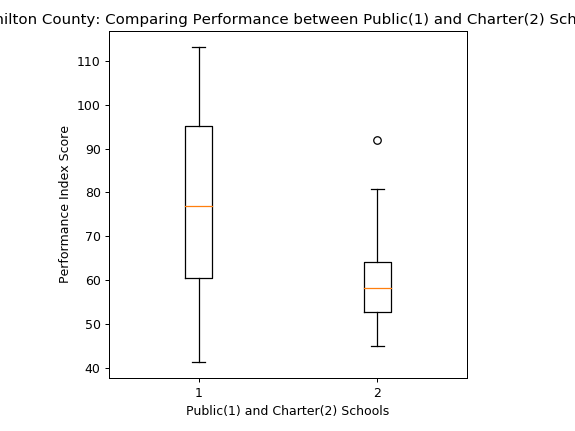

5.4672700433479715
6.595916637671241e-06


In [232]:
#t-test
public_df_ham = public_df.loc[public_df["County"]== "Hamilton"]
charter_df_ham = charter_schools_df.loc[charter_schools_df["County"]=="Hamilton"]
s1=public_df_ham["Performance Index Score 2015-16"]
s2=charter_df_ham["Performance Index Score 2016-17"]

plt.boxplot([s1, s2])
plt.title("Hamilton County: Comparing Performance between Public(1) and Charter(2) Schools")
plt.xlabel("Public(1) and Charter(2) Schools")
plt.ylabel("Performance Index Score")
(t_stat, p) = stats.ttest_ind(s1, s2, equal_var=False)
print(t_stat)
print(p)

fig_pub_ham = plt.gcf()

In [233]:

plt.tight_layout()
fig_pub_ham .savefig("Images/Hamilton_County_Public_Charter.png")
plt.show()


<IPython.core.display.Javascript object>


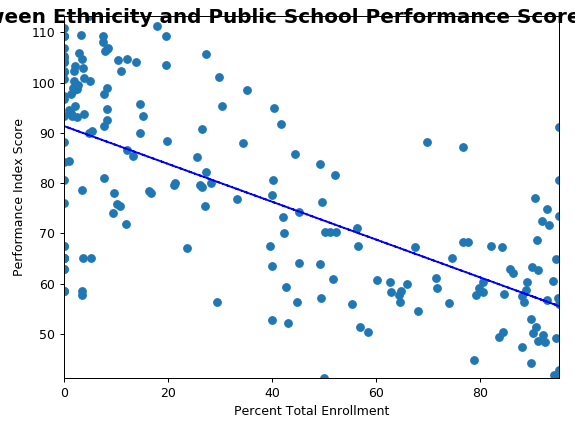

In [234]:
# Public Black Regression

x_ham_blk = public_black_ham["% of Total Enrollment"]
y_ham_blk =public_black_ham["Performance Index Score 2015-16"]

(hbk_slope, hbk_int, hbk_c_r, hbk_p, hbk_std_err) = stats.linregress(x_ham_blk, y_ham_blk)
fit = hbk_slope * x_ham_blk + hbk_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (Black Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_ham_blk), max(x_ham_blk))
ax.set_ylim(min(y_ham_blk), max(y_ham_blk))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_ham_blk, y_ham_blk, linewidth=0, marker='o')
ax.plot(x_ham_blk, fit, 'b--')

fig_pubblk_ham = plt.gcf()
plt.show()


In [235]:
plt.tight_layout()
fig_pubblk_ham.savefig("Images/Hamilton_Count_Public_Blk.png")
plt.show()

<IPython.core.display.Javascript object>


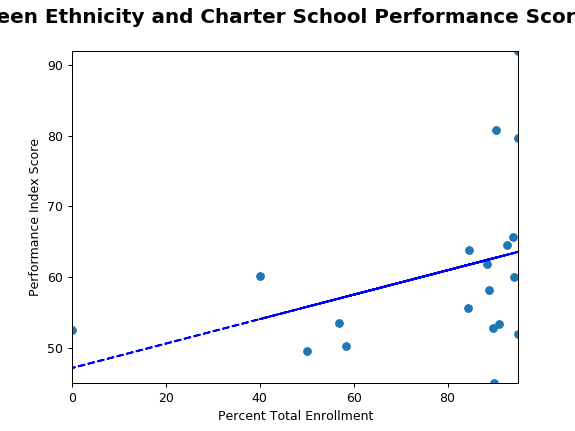

In [236]:
#Charter School Black Performance

x_ham_blk2 =charterblack_hamilton["% of Total Enrollment"]
y_ham_blk2 =charterblack_hamilton["Performance Index Score 2016-17"]

(hbk2_slope, hbk2_int, hbk2_c_r, hbk2_p, hbk2_std_err) = stats.linregress(x_ham_blk2, y_ham_blk2)
fit = hbk2_slope * x_ham_blk2 + hbk2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (Black Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_ham_blk2), max(x_ham_blk2))
ax.set_ylim(min(y_ham_blk2), max(y_ham_blk2))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_ham_blk2, y_ham_blk2, linewidth=0, marker='o')
ax.plot(x_ham_blk2, fit, 'b--')

fig_charblk_ham = plt.gcf()

plt.show()


In [170]:
plt.tight_layout()
fig_charblk_ham.savefig("Images/Hamilton_Count_Charter_Blk.png")
plt.show()

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


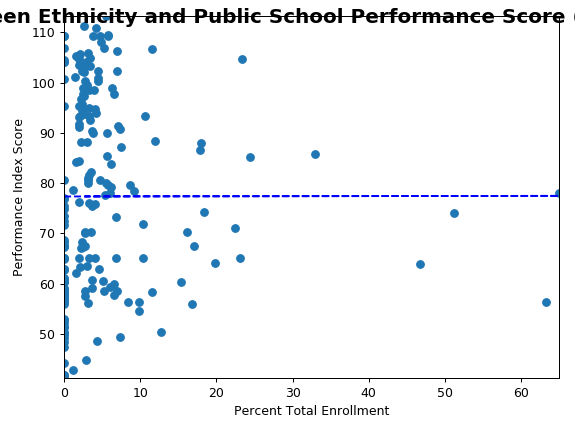

In [237]:
# Public Hispanix Regression

x_ham_lat = public_latinx_ham["% of Total Enrollment"]
y_ham_lat =public_latinx_ham["Performance Index Score 2015-16"]

(hlk_slope, hlk_int, hlk_c_r, hlk_p, hlk_std_err) = stats.linregress(x_ham_lat, y_ham_lat)
fit = hlk_slope * x_ham_lat + hlk_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (Latino/a Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_ham_lat), max(x_ham_lat))
ax.set_ylim(min(y_ham_lat), max(y_ham_lat))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_ham_lat, y_ham_lat, linewidth=0, marker='o')
ax.plot(x_ham_lat, fit, 'b--')
fig_publat_ham = plt.gcf()

plt.show()

In [238]:
plt.tight_layout()
fig_publat_ham.savefig("Images/Hamilton_Count_Public_latino.png")
plt.show()

<IPython.core.display.Javascript object>


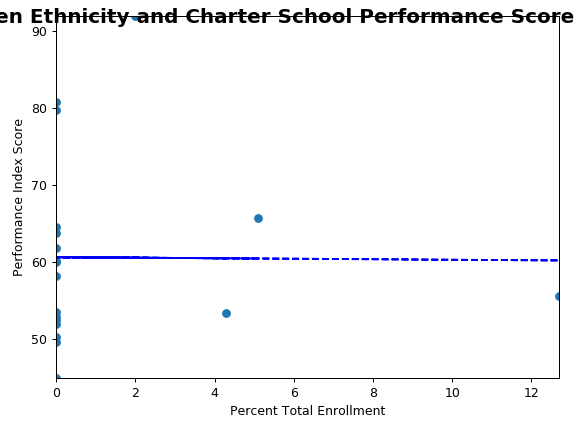

In [239]:
#Charter School Hispanic Performance

x_ham_lat2 =charterhispanic_hamilton["% of Total Enrollment"]
y_ham_lat2 =charterhispanic_hamilton["Performance Index Score 2016-17"]

(hlk2_slope, hlk2_int, hlk2_c_r, hlk2_p, hlk2_std_err) = stats.linregress(x_ham_lat2, y_ham_lat2)
fit = hlk2_slope * x_ham_lat2 + hlk2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (Latino/a Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_ham_lat2), max(x_ham_lat2))
ax.set_ylim(min(y_ham_lat2), max(y_ham_lat2))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_ham_lat2, y_ham_lat2, linewidth=0, marker='o')
ax.plot(x_ham_lat2, fit, 'b--')
fig_charlat_ham = plt.gcf()

plt.show()

In [240]:
plt.tight_layout()
fig_charlat_ham.savefig("Images/Hamilton_Count_Charter_latino.png")
plt.show()

<IPython.core.display.Javascript object>


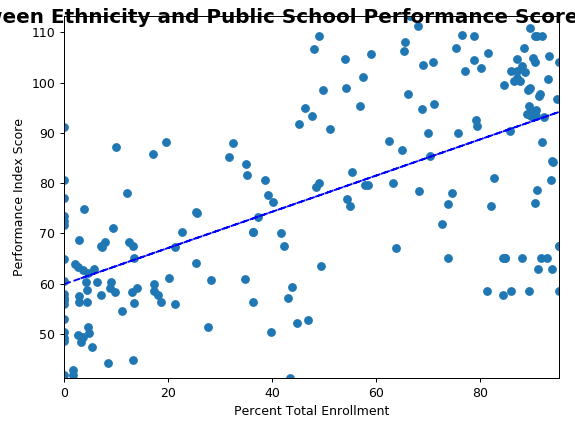

In [241]:
# Public White Regression

x_ham_wh = public_white_ham["% of Total Enrollment"]
y_ham_wh =public_white_ham["Performance Index Score 2015-16"]

(hwk_slope, hwk_int, hwk_c_r, hwk_p, hwk_std_err) = stats.linregress(x_ham_wh, y_ham_wh)
fit = hwk_slope * x_ham_wh + hwk_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Public School Performance Score (White Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_ham_wh), max(x_ham_wh))
ax.set_ylim(min(y_ham_wh), max(y_ham_wh))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_ham_wh, y_ham_wh, linewidth=0, marker='o')
ax.plot(x_ham_wh, fit, 'b--')

fig_pubwh_ham = plt.gcf()

plt.show()


In [242]:
plt.tight_layout()
fig_pubwh_ham.savefig("Images/Hamilton_Count_Public_white.png")
plt.show()

<IPython.core.display.Javascript object>


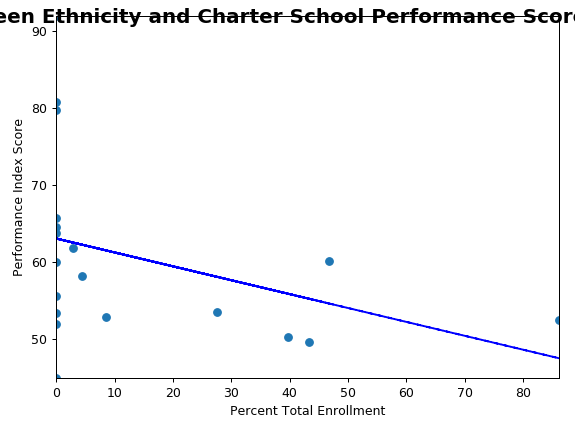

In [243]:

x_ham_wh2 =charterwhite_hamilton["% of Total Enrollment"]
y_ham_wh2 =charterwhite_hamilton["Performance Index Score 2016-17"]

(hwk2_slope, hwk2_int, hwk2_c_r, hwk2_p, hwk2_std_err) = stats.linregress(x_ham_wh2, y_ham_wh2)
fit = hwk2_slope * x_ham_wh2 + hwk2_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and Charter School Performance Score (White Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_ham_wh2), max(x_ham_wh2))
ax.set_ylim(min(y_ham_wh2), max(y_ham_wh2))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_ham_wh2, y_ham_wh2, linewidth=0, marker='o')
ax.plot(x_ham_wh2, fit, 'b--')

fig_charwh_ham = plt.gcf()

plt.show()

In [244]:
plt.tight_layout()
fig_charwh_ham.savefig("Images/Hamilton_Count_Charter_white.png")
plt.show()

<IPython.core.display.Javascript object>


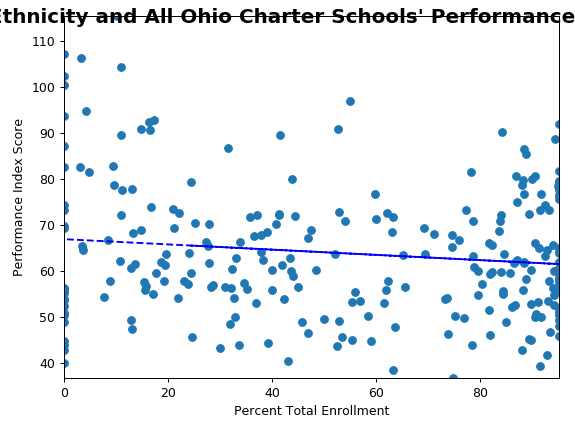

In [245]:

x_charter_blk_all =charterblack_df["% of Total Enrollment"]
y_charter_blk_all =charterblack_df["Performance Index Score 2016-17"]

(cbc_slope, cbc_int, cbc_c_r, cbc_p, cbc_std_err) = stats.linregress(x_charter_blk_all, y_charter_blk_all)
fit = cbc_slope * x_charter_blk_all + cbc_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Ethnicity and All Ohio Charter Schools' Performance Score (Black Students)", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_charter_blk_all), max(x_charter_blk_all))
ax.set_ylim(min(y_charter_blk_all), max(y_charter_blk_all))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_charter_blk_all,y_charter_blk_all, linewidth=0, marker='o')
ax.plot(x_charter_blk_all, fit, 'b--')

fig_allblk_ham = plt.gcf()

plt.show()

In [246]:
plt.tight_layout()
fig_allblk_ham.savefig("Images/All_OHIO_Charter_black.png")
plt.show()

<IPython.core.display.Javascript object>


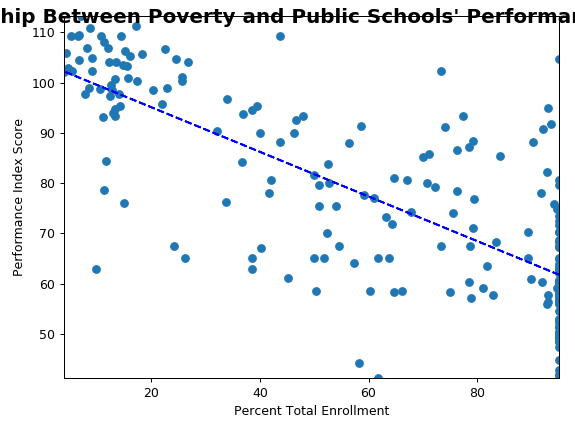

In [247]:

x_public_ham_poor =public_poor_ham["% of Total Enrollment"]
y_public_ham_poor =public_poor_ham["Performance Index Score 2015-16"]

(hpp_slope, hpp_int, hpp_c_r, hpp_p, hpp_std_err) = stats.linregress(x_public_ham_poor, y_public_ham_poor)
fit = hpp_slope * x_public_ham_poor + hpp_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Poverty and Public Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_public_ham_poor), max(x_public_ham_poor))
ax.set_ylim(min(y_public_ham_poor), max(y_public_ham_poor))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_public_ham_poor,y_public_ham_poor, linewidth=0, marker='o')
ax.plot(x_public_ham_poor, fit, 'b--')

fig_pubpoor_ham = plt.gcf()

plt.show()

In [248]:
plt.tight_layout()
fig_pubpoor_ham.savefig("Images/Hamilton_County_Poverty_Public.png")
plt.show()

<IPython.core.display.Javascript object>


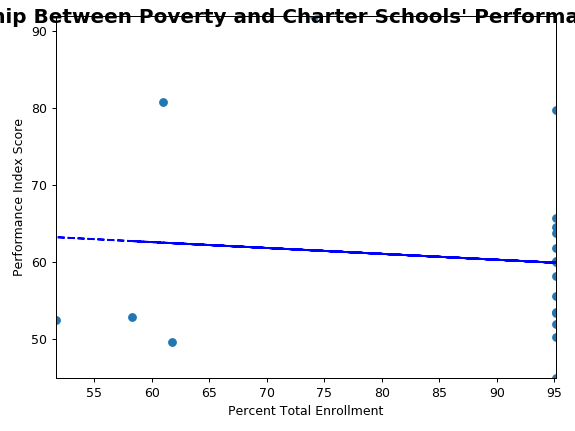

In [249]:

x_charter_ham_poor =charter_disadv_hamilton["% of Total Enrollment"]
y_charter_ham_poor =charter_disadv_hamilton["Performance Index Score 2016-17"]

(hpc_slope, hpc_int, hpc_c_r, hpc_p, hpc_std_err) = stats.linregress(x_charter_ham_poor, y_charter_ham_poor)
fit = hpc_slope * x_charter_ham_poor + hpc_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Poverty and Charter Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_charter_ham_poor), max(x_charter_ham_poor))
ax.set_ylim(min(y_charter_ham_poor), max(y_charter_ham_poor))

ax.set_xlabel("Percent Total Enrollment")
ax.set_ylabel("Performance Index Score")

ax.plot(x_charter_ham_poor,y_charter_ham_poor, linewidth=0, marker='o')
ax.plot(x_charter_ham_poor, fit, 'b--')

fig_charpoor_ham = plt.gcf()

plt.show()

In [250]:
plt.tight_layout()
fig_charpoor_ham.savefig("Images/Hamilton_County_Poverty_Charter.png")
plt.show()

In [195]:
#charter_pay_ham = charter_pay_ham.loc[charter_pay_ham["Performance Index Score 2016-17"] != "NC"]
charter_pay_ham["Total Annual Payroll"]=charter_pay_ham["Total Annual Payroll"].astype(float)
charter_pay_ham["Performance Index Score 2016-17"]=charter_pay_ham["Performance Index Score 2016-17"].astype(float)


public_pay_ham["Total Annual Payroll"]=public_pay_ham["Total Annual Payroll"].astype(float)
public_pay_ham["Performance Index Score 2015-16"]=public_pay_ham["Performance Index Score 2015-16"].astype(float)


<IPython.core.display.Javascript object>


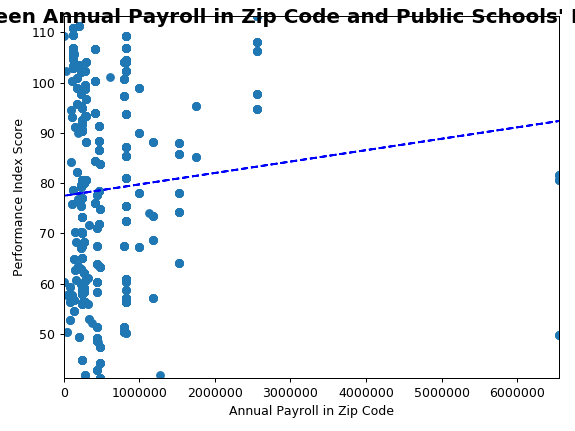

In [251]:
x_pub_ham_pay =public_pay_ham["Total Annual Payroll"]
y_public_ham_pay =public_pay_ham["Performance Index Score 2015-16"]

(pph_slope, pph_int, pph_c_r, pph_p, pph_std_err) = stats.linregress(x_pub_ham_pay,y_public_ham_pay)
fit = pph_slope * x_pub_ham_pay + pph_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Annual Payroll in Zip Code and Public Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_pub_ham_pay), max(x_pub_ham_pay))
ax.set_ylim(min(y_public_ham_pay), max(y_public_ham_pay))

ax.set_xlabel("Annual Payroll in Zip Code")
ax.set_ylabel("Performance Index Score")

ax.plot(x_pub_ham_pay,y_public_ham_pay, linewidth=0, marker='o')
ax.plot(x_pub_ham_pay, fit, 'b--')

fig_pubpay_ham = plt.gcf()

plt.show()



In [252]:
plt.tight_layout()
fig_pubpay_ham.savefig("Images/Hamilton_County_Payroll_Public.png")
plt.show()

<IPython.core.display.Javascript object>


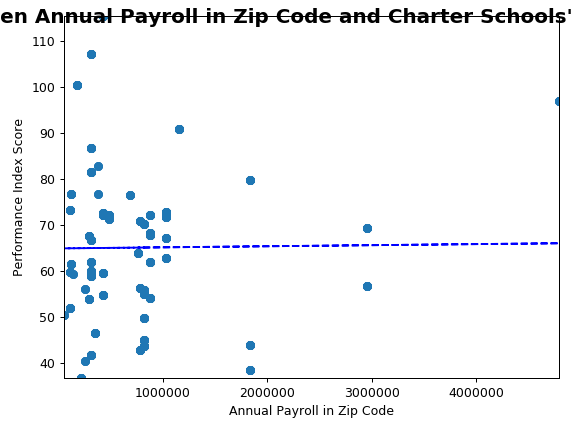

In [253]:
x_chart_ham_pay =charter_pay_ham["Total Annual Payroll"]
y_chart_ham_pay =charter_pay_ham["Performance Index Score 2016-17"]

(cph_slope, cph_int, cph_c_r, cph_p, cph_std_err) = stats.linregress(x_chart_ham_pay ,y_chart_ham_pay)
fit = cph_slope * x_chart_ham_pay  + cph_int

fig, ax = plt.subplots()

fig.suptitle("Relationship Between Annual Payroll in Zip Code and Charter Schools' Performance Score", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_chart_ham_pay ), max(x_chart_ham_pay ))
ax.set_ylim(min(y_chart_ham_pay), max(y_chart_ham_pay))

ax.set_xlabel("Annual Payroll in Zip Code")
ax.set_ylabel("Performance Index Score")

ax.plot(x_chart_ham_pay ,y_chart_ham_pay, linewidth=0, marker='o')
ax.plot(x_chart_ham_pay , fit, 'b--')

fig_charpay_ham = plt.gcf()


plt.show()


In [254]:
plt.tight_layout()
fig_charpay_ham.savefig("Images/Hamilton_County_Payroll_Charter.png")
plt.show()

In [211]:
print("Black Public CR and P "+ str(hbk_c_r) +" , " + str(hbk_p))
print("Black Charter CR and P "+ str(hbk2_c_r) +" , " + str(hbk2_p))
print("Latino Public CR and P "+ str(hlk_c_r) +" , " + str(hlk_p))
print("Latino Charter CR and P "+ str(hlk2_c_r) +" , " + str(hlk2_p))
print("White Public CR and P "+ str(hwk_c_r) +" , " + str(hwk_p))
print("White Charter CR and P "+ str(hwk2_c_r) +" , " + str(hwk2_p))
print("Poor Public CR and P "+ str(hpp_c_r) +" , " + str(hpp_p))
print("Poor Charter CR and P "+ str(hpc_c_r) +" , " + str(hpc_p))
print("Pay Public CR and P "+ str(pph_c_r) +" , " + str(pph_p))
print("Pay Charter CR and P "+ str(cph_c_r) +" , " + str(cph_p))

Black Public CR and P -0.6756783613598567 , 9.316875847059938e-28
Black Charter CR and P 0.36429478539890475 , 0.12518393728600985
Latino Public CR and P 0.0008860608496832295 , 0.9901152275572891
Latino Charter CR and P -0.008705018247513071 , 0.9717857232038377
White Public CR and P 0.6415554281664281 , 2.3623439886552994e-24
White Charter CR and P -0.35960916688771594 , 0.1304826299672473
Poor Public CR and P -0.7662946633760132 , 1.6257311401638353e-39
Poor Charter CR and P -0.0996420105342553 , 0.6848484921517045
Pay Public CR and P 0.08760922137020619 , 0.005858677694300336
Pay Charter CR and P 0.009301861523096162 , 0.7970257131337074


Building Name                      368
Student Group                      368
% of Total Enrollment              368
District Name                      368
County                             368
City, State, Zip Code              368
Performance Index Score 2015-16    368
City                               368
State                              368
Zip Code                           368
Code+4                             367
dtype: int64
Building Name                      368
Student Group                      368
% of Total Enrollment              368
District Name                      368
County                             368
City, State, Zip Code              368
Performance Index Score 2015-16    368
City                               368
State                              368
Zip Code                           368
Code+4                             367
dtype: int64
Building Name                      368
Student Group                      368
% of Total Enrollment              368

In [227]:
charter_nondisadv_hamilton.count()

Building Name                      19
District Name                      19
County                             19
City and Zip Code                  19
Performance Index Score 2016-17    19
City                               19
State                              19
Zip Code                           19
Code+4                             19
Student Group                      19
% of Total Enrollment              19
dtype: int64